# NDBK Analysis

In [ ]:
from pathlib import Path
from typing import List
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import mlflow


font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 14}

matplotlib.rc('font', **font)

In [39]:
def process_string_list(s: str) -> List[str]:
    return list(map(lambda x: x[1:-1], s[1:-1].split(", ")))


df = pd.read_csv("../data/mlflow_experiment5_runs.tsv", sep='\t')
df = df.loc[(df["Status"] == "FINISHED") & (df["Name"] == "v.0.1.1_dev_2")].copy()
df["ag_pos"] = df["ag_pos"].replace({"5E+094": "5E94"})
df["ag_neg"] = df["ag_neg"].apply(process_string_list)
df["ag_neg_len"] = list(map(len, df["ag_neg"]))
print(df.shape)
print(df.columns)
df.head()

(183, 37)
Index(['Start Time', 'Duration', 'Run ID', 'Name', 'Source Type',
       'Source Name', 'User', 'Status', 'N_closed', 'N_open', 'N_train',
       'ag_neg', 'ag_pos', 'batch_size', 'epochs', 'learning_rate', 'momentum',
       'optimizer_type', 'sample', 'sample_train', 'weight_decay', 'closed_f1',
       'closed_precision', 'closed_recall', 'closed_roc_auc', 'open_acc',
       'open_avg_precision', 'open_f1', 'open_fpr_abs_logit_model',
       'open_fpr_naive_model', 'open_precision', 'open_recall', 'open_roc_auc',
       'test_acc', 'test_loss', 'train_loss', 'ag_neg_len'],
      dtype='object')


,Start Time,Duration,Run ID,Name,Source Type,Source Name,User,Status,N_closed,N_open,...,open_f1,open_fpr_abs_logit_model,open_fpr_naive_model,open_precision,open_recall,open_roc_auc,test_acc,test_loss,train_loss,ag_neg_len
0,2022-09-20 22:19:09,16.7min,ee0854d191384500a06312f06b628008,v.0.1.1_dev_2,LOCAL,scripts/script_07_SN10_openset_NDBK.py,eugen,FINISHED,24016.0,131283.0,...,0.267862,0.999865,0.119718,0.154645,0.999875,0.528396,92.996336,0.186887,0.149383,5
1,2022-09-20 22:05:44,17.3min,0d57a3bfe18b474c8544d3f9edd2857b,v.0.1.1_dev_2,LOCAL,scripts/script_07_SN10_openset_NDBK.py,eugen,FINISHED,20799.0,131283.0,...,0.240932,0.954242,0.198891,0.137731,0.961008,0.541905,93.624693,0.167140,0.135129,4
2,2022-09-20 21:44:00,35.2min,d51c75ace7c14ba7a455dd2e39963063,v.0.1.1_dev_2,LOCAL,scripts/script_07_SN10_openset_NDBK.py,eugen,FINISHED,20376.0,131283.0,...,0.242526,0.419026,0.263644,0.160144,0.499460,0.545036,91.278956,0.211615,0.150765,4
3,2022-09-20 21:05:10,1.1h,408a9c8c937c495180329116b279960e,v.0.1.1_dev_2,LOCAL,scripts/script_07_SN10_openset_NDBK.py,eugen,FINISHED,16944.0,131283.0,...,0.219995,0.242398,0.292437,0.161870,0.343248,0.558720,92.705382,0.187420,0.284036,3
4,2022-09-20 20:59:29,1.1h,b8c4062a597f41b1b95e046db0e8bc44,v.0.1.1_dev_2,LOCAL,scripts/script_07_SN10_openset_NDBK.py,eugen,FINISHED,16370.0,131283.0,...,0.208695,0.514294,0.217827,0.126842,0.588393,0.537311,93.329261,0.157112,0.235503,3


In [38]:
df["ag_neg_len"].value_counts()

2    60
3    58
4    30
1    29
5     6
Name: ag_neg_len, dtype: int64

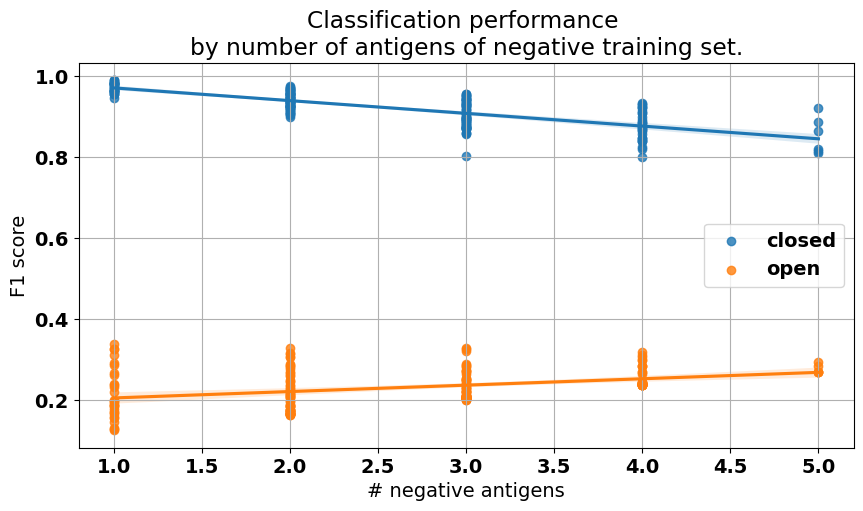

In [69]:
# df.plot.scatter(x="ag_neg_len", y="closed_f1")
# df.plot.scatter(x="ag_neg_len", y="open_f1")
fig, ax = plt.subplots(figsize=(10, 5))

sns.regplot(data=df, x="ag_neg_len", y="closed_f1", ax=ax, label="closed")
sns.regplot(data=df, x="ag_neg_len", y="open_f1", ax=ax, label="open")
ax.legend()
ax.set_ylabel("F1 score")
ax.set_xlabel("# negative antigens")
ax.set_title("Classification performance \nby number of antigens of negative training set.")
ax.grid()


## TODO: DEBUG THIS
# sns.regplot(data=df, x="ag_neg_len", y="closed_f1", ax=ax[0], label="closed")
# sns.regplot(data=df, x="ag_neg_len", y="open_f1", ax=ax[0], label="open")
# ax[0].legend()
# ax[0].set_ylabel("F1 score")
# ax[0].set_xlabel("# negative antigens")
# ax[0].set_title("Classification performance \nby number of antigens of negative training set.")

# sns.regplot(data=df, x="ag_neg_len", y="open_fpr_abs_logit_model", ax=ax[1], label="abs-logits")
# sns.regplot(data=df, x="ag_neg_len", y="open_fpr_naive_model", ax=ax[1], label="naive")
# ax[1].legend()
# ax[1].set_title("Open set FPR \nfor naive and abs-logits-based model.")

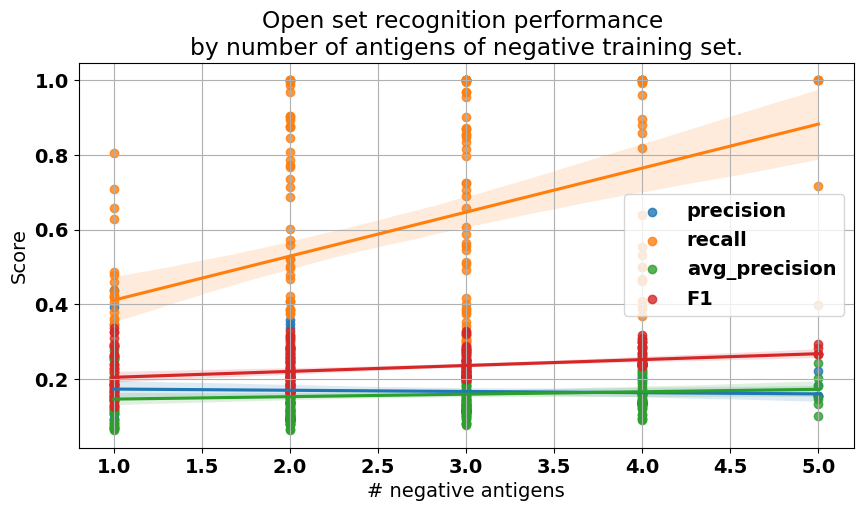

In [68]:
# 'open_fpr_naive_model', 'open_precision', 'open_recall'

fig, axs = plt.subplots(figsize=(10, 5))

sns.regplot(data=df, x="ag_neg_len", y="open_precision", ax=axs, label="precision")
sns.regplot(data=df, x="ag_neg_len", y="open_recall", ax=axs, label="recall")
sns.regplot(data=df, x="ag_neg_len", y="open_avg_precision", ax=axs, label="avg_precision")
sns.regplot(data=df, x="ag_neg_len", y="open_f1", ax=axs, label="F1")

axs.legend()
axs.set_ylabel("Score")
axs.set_xlabel("# negative antigens")
axs.set_title("Open set recognition performance \nby number of antigens of negative training set.")
axs.grid()

<AxesSubplot:xlabel='ag_neg_len', ylabel='test_acc'>

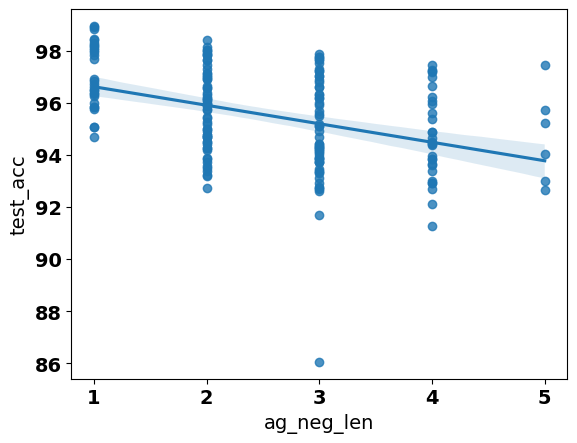

In [70]:
sns.regplot(data=df, x="ag_neg_len", y="test_acc")

In [ ]:
sns.regplot(data=df, x="ag_neg_len", y="test_acc")

<AxesSubplot:xlabel='ag_neg_len', ylabel='closed_recall'>

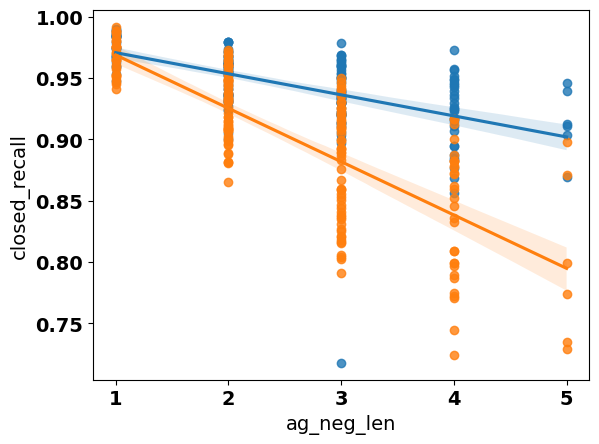

In [71]:
sns.regplot(data=df, x="ag_neg_len", y="closed_precision")
sns.regplot(data=df, x="ag_neg_len", y="closed_recall")